## How to Reduce Overfitting With Dropout Regularization in Keras

Dropout regularization is a computationally cheap way to regularize a deep neural network.

Dropout works by probabilistically removing, or “dropping out,” inputs to a layer, which may be input variables in the data sample or activations from a previous layer. It has the effect of simulating a large number of networks with very different network structure and, in turn, making nodes in the network generally more robust to the inputs.

In this tutorial, you will discover the Keras API for adding dropout regularization to deep learning neural network models.

## Dropout Regularization in Keras
Keras supports dropout regularization.

The simplest form of dropout in Keras is provided by a Dropout core layer.

When created, the dropout rate can be specified to the layer as the probability of setting each input to the layer to zero. This is different from the definition of dropout rate from the papers, in which the rate refers to the probability of retaining an input.

Therefore, when a dropout rate of 0.8 is suggested in a paper (retain 80%), this will, in fact, will be a dropout rate of 0.2 (set 20% of inputs to zero).

Below is an example of creating a dropout layer with a 50% chance of setting inputs to zero.

Train: 1.000, Test: 0.771


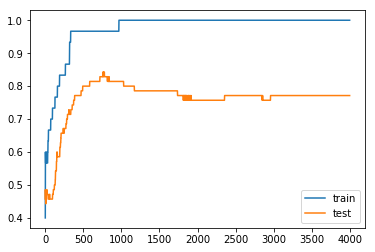

In [2]:


# mlp overfit on the two circles dataset
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()


Running the example reports the model performance on the train and test datasets.

We can see that the model has better performance on the training dataset than the test dataset, one possible sign of overfitting.

Your specific results may vary given the stochastic nature of the neural network and the training algorithm. Because the model is severely overfit, we generally would not expect much, if any, variance in the accuracy across repeated runs of the model on the same dataset.

## Overfit MLP With Dropout Regularization
We can update the example to use dropout regularization.

We can do this by simply inserting a new Dropout layer between the hidden layer and the output layer. In this case, we will specify a dropout rate (probability of setting outputs from the hidden layer to zero) to 40% or 0.4.

Train: 0.967, Test: 0.814


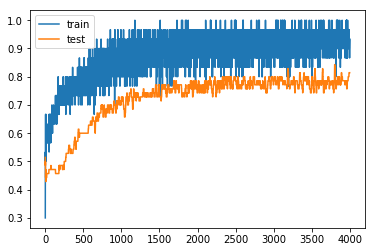

In [4]:
# mlp with dropout on the two circles dataset
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()